In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('/content/data.xlsx')

In [4]:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38821 entries, 0 to 38820
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38819 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  float64       
 7   longitude                       38821 non-null  float64       
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 10  minimum_nights                  38821 non-null  int64         
 11  nu

In [ ]:
data.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
import missingno as msno

<Axes: >

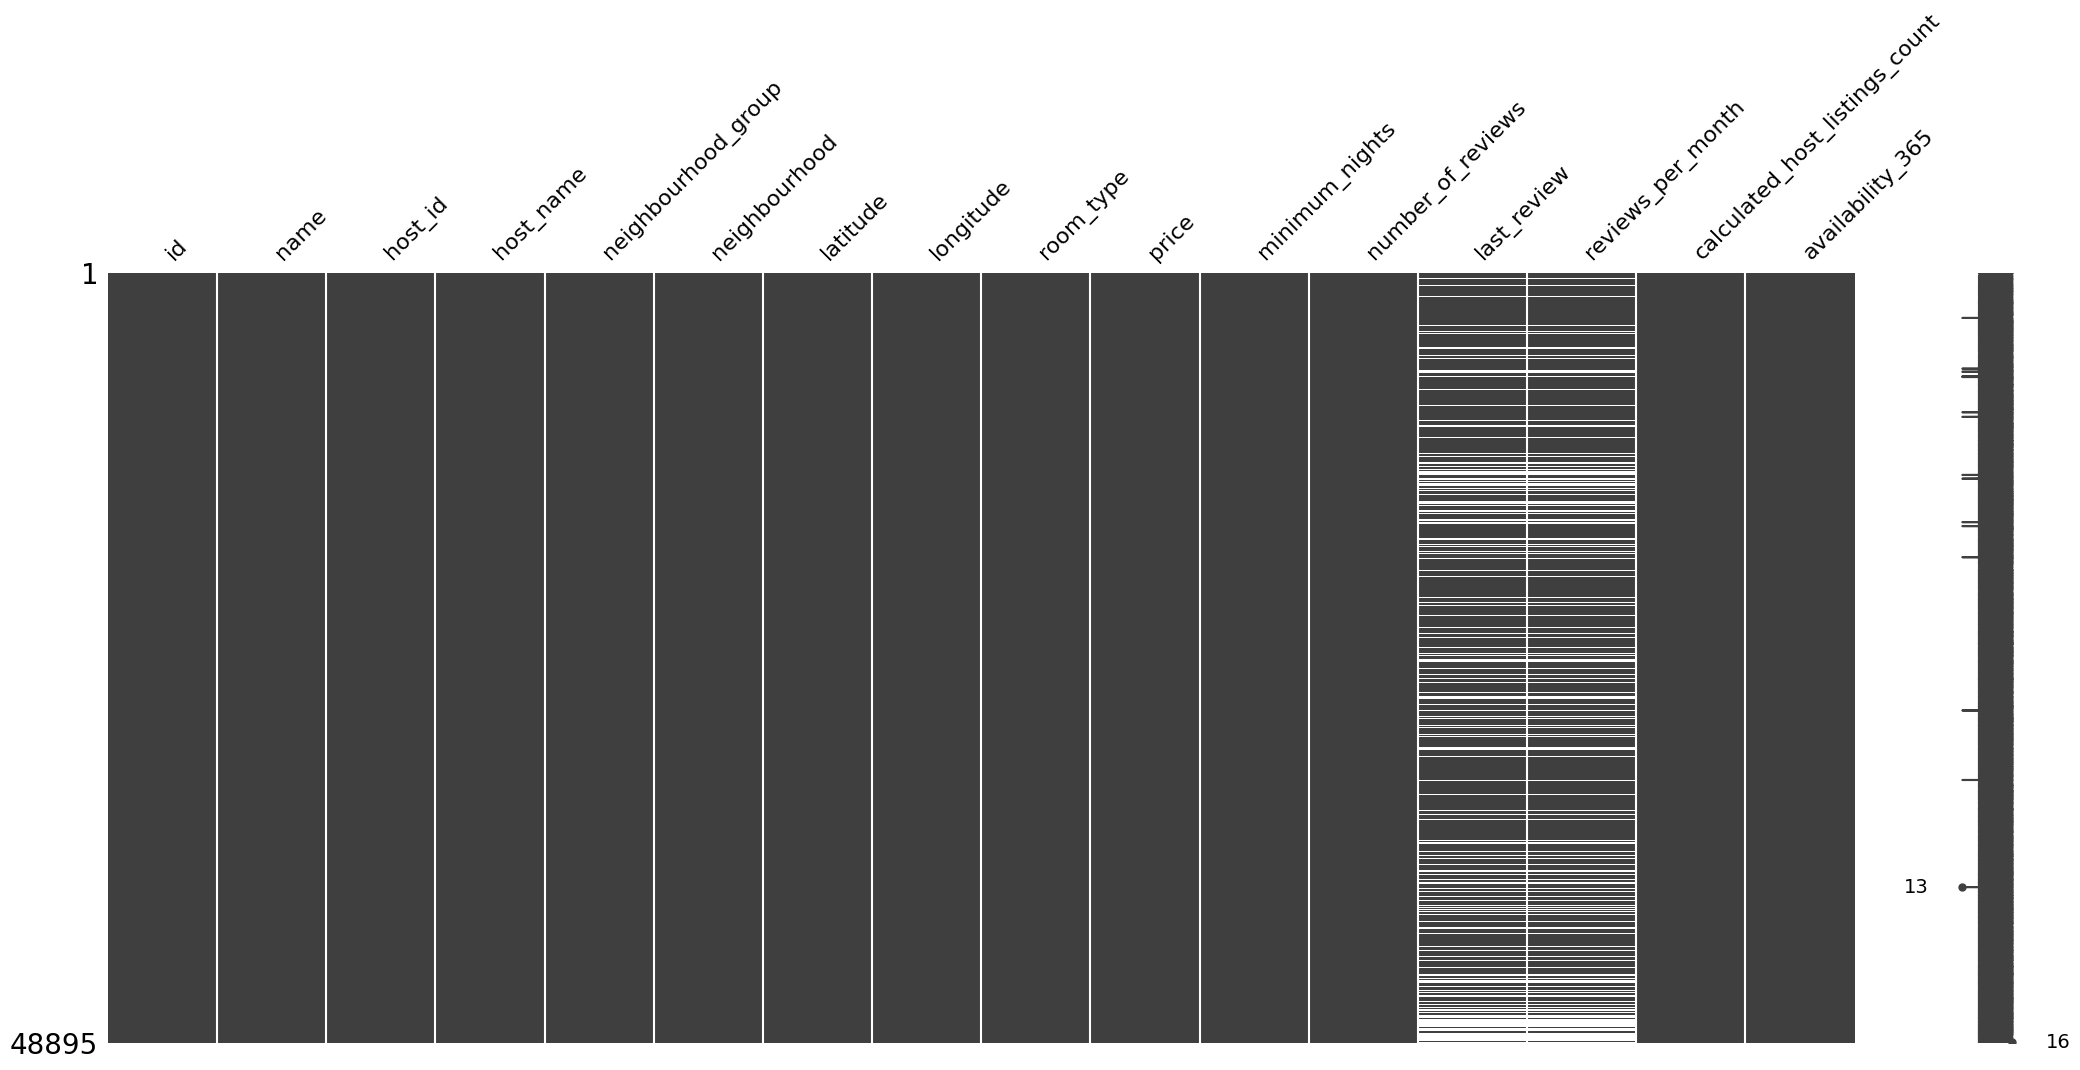

In [ ]:
msno.matrix(data)

In [ ]:
data.dropna(inplace=True)
data['last_review'] = pd.to_datetime(data['last_review'])  # Convert to datetime


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  float64       
 7   longitude                       38821 non-null  float64       
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 10  minimum_nights                  38821 non-null  int64         
 11  number_

In [ ]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,2018-10-04 07:23:47.072975872,1.373229,5.166611,114.886299
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,2018-07-09 00:00:00,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,2019-05-19 00:00:00,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2019-06-23 00:00:00,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,NaN,1.680328,26.302954,129.529950


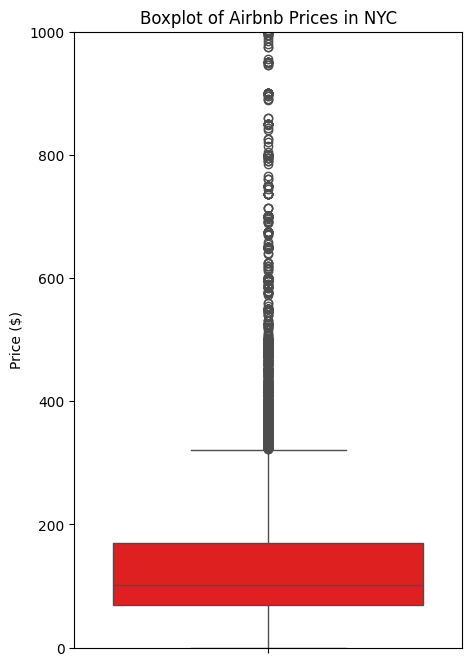

In [ ]:
plt.figure(figsize=(5, 8))
sns.boxplot(y=data['price'], color='red')
plt.ylabel("Price ($)")
plt.title("Boxplot of Airbnb Prices in NYC")
plt.ylim(0, 1000)
plt.show()

In [ ]:
data['price'] = np.where(data['price'] > 330, 330, data['price'])


data = data[~((data['availability_365'] == 365) & (data['number_of_reviews'] == 0))]

In [ ]:
avg_price_borough = data.groupby('neighbourhood_group')['price'].mean().sort_values()
avg_price_neighborhood = data.groupby('neighbourhood')['price'].mean().sort_values()

# Neighborhoods with highest & lowest avg prices
highest_price_neighborhoods = avg_price_neighborhood.tail(10)
lowest_price_neighborhoods = avg_price_neighborhood.head(10)

In [ ]:
highest_price_neighborhoods

,price
neighbourhood,
Greenwich Village,195.016340
Financial District,203.536346
SoHo,205.062718
Midtown,208.189655
West Village,210.219672
Flatiron District,227.344828
NoHo,236.580645
Willowbrook,249.000000
Tribeca,251.172727


<ipython-input-16-72c70493552f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_borough.index, y=avg_price_borough.values, palette="viridis")


Text(0.5, 0, 'Borough')

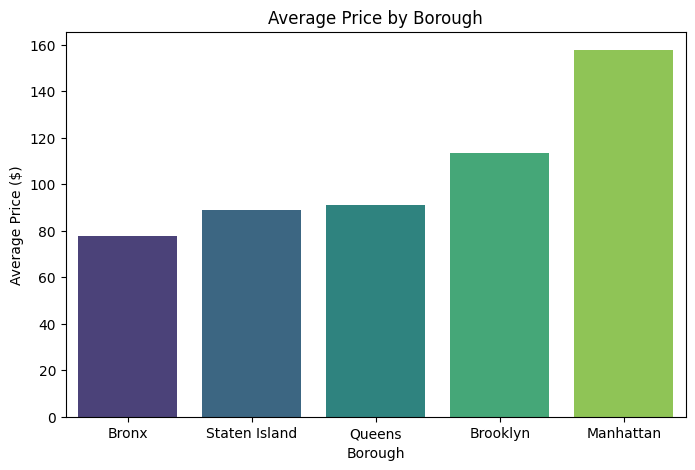

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_borough.index, y=avg_price_borough.values, palette="viridis")
plt.title("Average Price by Borough")
plt.ylabel("Average Price ($)")
plt.xlabel("Borough")

In [ ]:
price_thresholds = data.groupby('neighbourhood_group')['price'].quantile(0.95)
data['overpriced'] = data.apply(lambda x: x['price'] > price_thresholds[x['neighbourhood_group']], axis=1)

In [ ]:
overpriced_counts = data.groupby('neighbourhood_group')['overpriced'].sum()

<ipython-input-20-cc11ede35a24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=listings_per_borough.index, y=listings_per_borough.values, palette="magma")


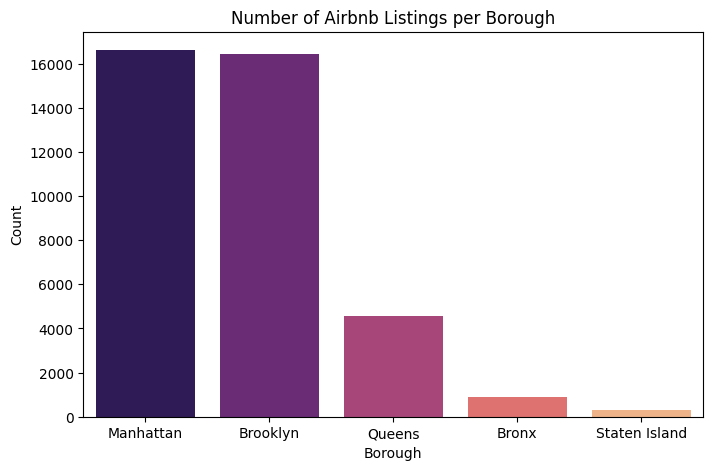

In [ ]:
listings_per_borough = data['neighbourhood_group'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=listings_per_borough.index, y=listings_per_borough.values, palette="magma")
plt.title("Number of Airbnb Listings per Borough")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.show()

In [ ]:
data['review_month'] = data['last_review'].dt.month
monthly_reviews = data['review_month'].value_counts().sort_index()

In [ ]:
monthly_reviews

,count
review_month,
1,2766
2,770
3,1288
4,2109
5,4700
6,13586
7,5933
8,1663
9,1535


Text(0.5, 0, 'Month')

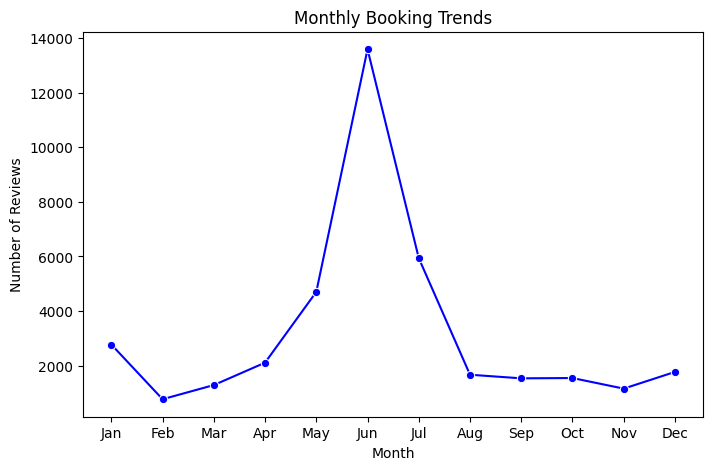

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_reviews.index, y=monthly_reviews.values, marker="o", color="b")
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Booking Trends")
plt.ylabel("Number of Reviews")
plt.xlabel("Month")

<ipython-input-31-552cfe823c67>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=types.index, y=types.values, palette="coolwarm")


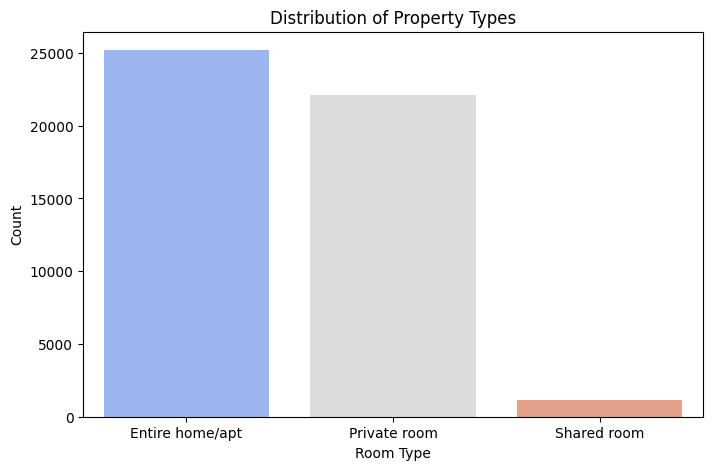

Top Hosts with Most Listings:
 host_name
Sonder (NYC)         103659
Blueground            53592
Kara                  13227
Kazuya                10609
Jeremy & Laura         9120
Sonder                 9024
Corporate Housing      8281
Ken                    6688
Pranjal                3705
Mike                   2857
Name: calculated_host_listings_count, dtype: int64


In [ ]:
types = data['room_type'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=types.index, y=types.values, palette="coolwarm")
plt.title("Distribution of Property Types")
plt.ylabel("Count")
plt.xlabel("Room Type")
plt.show()

In [ ]:
top_hosts = data.groupby('host_name')['calculated_host_listings_count'].sum().sort_values(ascending=False).head(10)
print("Top Hosts with Most Listings:\n", top_hosts)

Top Hosts with Most Listings:
 host_name
Sonder (NYC)         103659
Blueground            53592
Kara                  13227
Kazuya                10609
Jeremy & Laura         9120
Sonder                 9024
Corporate Housing      8281
Ken                    6688
Pranjal                3705
Mike                   2857
Name: calculated_host_listings_count, dtype: int64


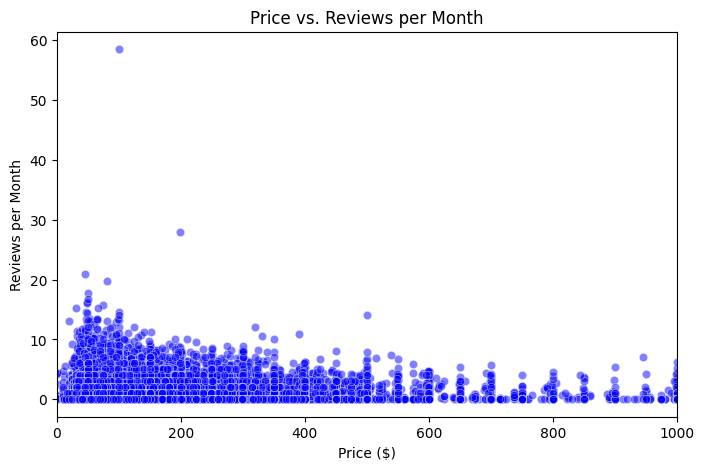

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['price'], y=data['reviews_per_month'], alpha=0.5, color='blue')
plt.title("Price vs. Reviews per Month")
plt.xlabel("Price ($)")
plt.ylabel("Reviews per Month")
plt.xlim(0, 1000)
plt.show()


In [ ]:
avg_reviews_borough = data.groupby('neighbourhood_group')['reviews_per_month'].mean().sort_values()


<ipython-input-37-3e3f800e832c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_reviews_borough.index, y=avg_reviews_borough.values, palette="coolwarm")


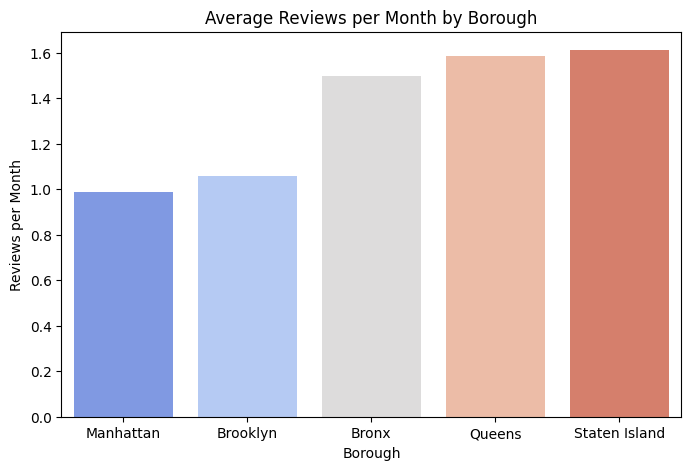

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_reviews_borough.index, y=avg_reviews_borough.values, palette="coolwarm")
plt.title("Average Reviews per Month by Borough")
plt.ylabel("Reviews per Month")
plt.xlabel("Borough")
plt.show()

In [ ]:
highly_rated = data[data['reviews_per_month'] > data['reviews_per_month'].quantile(0.75)]

In [ ]:
highly_rated_counts = highly_rated['neighbourhood_group'].value_counts()

In [ ]:
print("Highly Rated Listings per Borough:\n", highly_rated_counts)

Highly Rated Listings per Borough:
 neighbourhood_group
Brooklyn         4875
Manhattan        4699
Queens           1961
Bronx             402
Staten Island     145
Name: count, dtype: int64
